In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('./rmd/wgcna/')
import utils
import pybiomart
from GenFocus import genfocus
%matplotlib inline

In [2]:
data = pd.read_csv('cancer_data_aft_preprocessing.csv', index_col='Unnamed: 0').T
data.shape

(347, 20226)

In [3]:
features = [bool(i) for i in list(data['censOS'])]
data.drop(['censOS'], axis = 1, inplace = True)

In [4]:
print(features)
#data

[True, True, True, False, True, True, True, False, True, True, True, True, True, False, True, False, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, False, True, True, True, True, True, False, True, False, False, True, False, False, False, True, False, True, True, True, True, True, False, True, True, False, True, False, True, True, True, False, False, True, True, True, False, True, False, True, False, True, True, False, True, False, False, True, True, True, True, False, False, False, True, False, True, False, False, True, False, False, True, False, True, True, True, True, True, True, True, True, False, False, True, False, False, False, True, True, True, True, True, True, True, False, True, True, False, True, True, False, True, False, False, True, True, True, False, False, True, True, True, False, True, False, False, True, True, True, True, False, True, False, False, True, True, True, False, False, True, False, True, False, True, True, False,

In [5]:
data = data.loc[:, (data != data.iloc[0]).any()]
data = data.drop_duplicates()
data = data.T.drop_duplicates().T

In [6]:
dataset = pybiomart.Dataset(name='hsapiens_gene_ensembl', host='http://www.ensembl.org')
genes = dataset.query(attributes=['external_gene_name', "chromosome_name", "transcript_biotype"])
protein_coding = genes[genes['Transcript type'] == 'protein_coding']
protein_coding = protein_coding[protein_coding['Chromosome/scaffold name'].isin([str(i) for i in range(0, 23)])]
proteins = protein_coding['Gene name']
protein_keys = list(proteins.dropna())
len(protein_keys)
data = data.T.loc[~data.T.index.duplicated(), :].T
data = data.filter(items = protein_keys, axis = 1)

In [7]:
data

,PARP4,MIPEP,KATNAL1,UBE2L5,CCNA1,USPL1,URAD,HMGB1,SOHLH2,GPALPP1,...,ZNF687,PI4KB,RFX5,SELENBP1,PSMB4,CGN,TUFT1,POGZ,RPS6KA1,DHDDS
SAM5cc2d9036053,34.630080,10.958092,7.684974,0.000000,0.054485,8.97402,0.000000,155.403945,0.116785,16.568970,...,5.844156,76.027354,61.084735,20.588132,96.652825,54.965020,34.668180,64.058942,15.728685,62.113266
SAM568ce160abd9,39.720388,9.503548,14.465686,0.072927,0.579744,9.52599,0.084892,133.242834,0.422643,19.888790,...,4.044897,54.548353,32.267310,18.389704,108.600852,26.727391,15.945376,86.895816,8.406308,68.572679
SAMbfdffb97c446,39.919292,9.747908,6.888243,0.348228,0.089853,14.07366,0.000000,146.273675,0.551743,20.555434,...,13.345547,99.740610,32.287639,5.379508,275.374180,65.980619,97.162883,78.571082,15.556833,71.209468
SAM14938611a2d3,58.419478,36.087746,6.344313,0.010376,0.129770,9.27892,0.000000,162.819233,0.331109,13.042333,...,14.307622,107.795383,56.999348,29.535364,221.992737,292.970970,148.242989,97.129081,14.757478,82.095359
SAM675a12a09c15,68.579041,11.442537,6.098883,0.406916,0.197142,10.97936,0.000000,155.517311,0.092450,26.131189,...,8.123394,71.524674,27.832492,24.086803,142.808892,140.913250,54.052127,70.276584,16.733368,71.863640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM110501d0eedb,55.155323,19.572884,2.409174,0.010974,0.000000,10.76579,0.000000,112.188630,0.137890,27.631090,...,12.392991,114.253425,60.734674,8.391175,169.696899,146.701181,62.481829,47.785724,10.895298,92.375782
SAM065890737112,66.639831,8.670669,1.383004,0.061545,1.178930,9.94354,0.018486,154.335341,0.126115,24.593748,...,25.770280,177.768342,88.659259,2.736124,344.019150,193.655224,139.063462,141.224854,7.725825,106.245184
SAM28e6031ac18b,112.612322,11.300408,2.397337,0.000000,0.296888,15.18086,0.000000,138.710594,0.273832,33.140922,...,11.118360,70.567328,40.662220,1.354343,168.487630,19.768333,60.613820,76.514890,11.092980,56.356014
SAMe94c30c30616,59.892890,15.213199,4.232801,0.151943,0.160210,13.53458,0.000000,117.913102,0.135943,29.535951,...,10.539385,69.903290,37.938410,5.472449,139.089327,129.716500,82.971820,50.006149,9.356026,78.580329


/home/alexandr/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/alexandr/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,PARP4,MIPEP,KATNAL1,UBE2L5,CCNA1,USPL1,URAD,HMGB1,SOHLH2,GPALPP1,...,UBIAD1,ZNF687,PI4KB,RFX5,SELENBP1,PSMB4,CGN,TUFT1,POGZ,RPS6KA1
SAM5cc2d9036053,34.630080,10.958092,7.684974,0.000000,0.054485,8.97402,0.000000,155.403945,0.116785,16.568970,...,12.067421,5.844156,76.027354,61.084735,20.588132,96.652825,54.965020,34.668180,64.058942,15.728685
SAM568ce160abd9,39.720388,9.503548,14.465686,0.072927,0.579744,9.52599,0.084892,133.242834,0.422643,19.888790,...,9.195640,4.044897,54.548353,32.267310,18.389704,108.600852,26.727391,15.945376,86.895816,8.406308
SAMbfdffb97c446,39.919292,9.747908,6.888243,0.348228,0.089853,14.07366,0.000000,146.273675,0.551743,20.555434,...,17.386819,13.345547,99.740610,32.287639,5.379508,275.374180,65.980619,97.162883,78.571082,15.556833
SAM14938611a2d3,58.419478,36.087746,6.344313,0.010376,0.129770,9.27892,0.000000,162.819233,0.331109,13.042333,...,12.875988,14.307622,107.795383,56.999348,29.535364,221.992737,292.970970,148.242989,97.129081,14.757478
SAM675a12a09c15,68.579041,11.442537,6.098883,0.406916,0.197142,10.97936,0.000000,155.517311,0.092450,26.131189,...,14.260708,8.123394,71.524674,27.832492,24.086803,142.808892,140.913250,54.052127,70.276584,16.733368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM110501d0eedb,55.155323,19.572884,2.409174,0.010974,0.000000,10.76579,0.000000,112.188630,0.137890,27.631090,...,18.581394,12.392991,114.253425,60.734674,8.391175,169.696899,146.701181,62.481829,47.785724,10.895298
SAM065890737112,66.639831,8.670669,1.383004,0.061545,1.178930,9.94354,0.018486,154.335341,0.126115,24.593748,...,15.423004,25.770280,177.768342,88.659259,2.736124,344.019150,193.655224,139.063462,141.224854,7.725825
SAM28e6031ac18b,112.612322,11.300408,2.397337,0.000000,0.296888,15.18086,0.000000,138.710594,0.273832,33.140922,...,13.629683,11.118360,70.567328,40.662220,1.354343,168.487630,19.768333,60.613820,76.514890,11.092980
SAMe94c30c30616,59.892890,15.213199,4.232801,0.151943,0.160210,13.53458,0.000000,117.913102,0.135943,29.535951,...,16.665296,10.539385,69.903290,37.938410,5.472449,139.089327,129.716500,82.971820,50.006149,9.356026


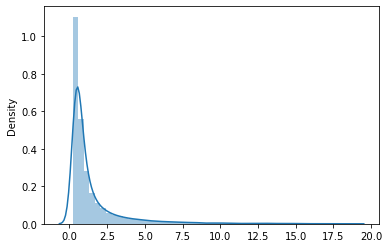

In [8]:
cv = lambda x: np.std(x, ddof=1) / np.mean(x)
data_cv = cv(data)
sns.distplot(data_cv)
ten_quartile_keys = data_cv[data_cv>data_cv.quantile(0.1)].index
data = data.filter(items = ten_quartile_keys, axis = 1)
data

In [9]:
clear_data = utils.bootstrap_filter(data).copy()
clear_data

,PARP4,MIPEP,KATNAL1,UBE2L5,CCNA1,USPL1,HMGB1,SOHLH2,GPALPP1,HSPH1,...,UBIAD1,ZNF687,PI4KB,RFX5,SELENBP1,PSMB4,CGN,TUFT1,POGZ,RPS6KA1
SAM5cc2d9036053,34.630080,10.958092,7.684974,0.000000,0.054485,8.97402,155.403945,0.116785,16.568970,72.900693,...,12.067421,5.844156,76.027354,61.084735,20.588132,96.652825,54.965020,34.668180,64.058942,15.728685
SAM568ce160abd9,39.720388,9.503548,14.465686,0.072927,0.579744,9.52599,133.242834,0.422643,19.888790,58.195025,...,9.195640,4.044897,54.548353,32.267310,18.389704,108.600852,26.727391,15.945376,86.895816,8.406308
SAMbfdffb97c446,39.919292,9.747908,6.888243,0.348228,0.089853,14.07366,146.273675,0.551743,20.555434,97.747532,...,17.386819,13.345547,99.740610,32.287639,5.379508,275.374180,65.980619,97.162883,78.571082,15.556833
SAM14938611a2d3,58.419478,36.087746,6.344313,0.010376,0.129770,9.27892,162.819233,0.331109,13.042333,105.611330,...,12.875988,14.307622,107.795383,56.999348,29.535364,221.992737,292.970970,148.242989,97.129081,14.757478
SAM675a12a09c15,68.579041,11.442537,6.098883,0.406916,0.197142,10.97936,155.517311,0.092450,26.131189,56.077748,...,14.260708,8.123394,71.524674,27.832492,24.086803,142.808892,140.913250,54.052127,70.276584,16.733368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM110501d0eedb,55.155323,19.572884,2.409174,0.010974,0.000000,10.76579,112.188630,0.137890,27.631090,113.847600,...,18.581394,12.392991,114.253425,60.734674,8.391175,169.696899,146.701181,62.481829,47.785724,10.895298
SAM065890737112,66.639831,8.670669,1.383004,0.061545,1.178930,9.94354,154.335341,0.126115,24.593748,67.254129,...,15.423004,25.770280,177.768342,88.659259,2.736124,344.019150,193.655224,139.063462,141.224854,7.725825
SAM28e6031ac18b,112.612322,11.300408,2.397337,0.000000,0.296888,15.18086,138.710594,0.273832,33.140922,105.829210,...,13.629683,11.118360,70.567328,40.662220,1.354343,168.487630,19.768333,60.613820,76.514890,11.092980
SAMe94c30c30616,59.892890,15.213199,4.232801,0.151943,0.160210,13.53458,117.913102,0.135943,29.535951,60.725859,...,16.665296,10.539385,69.903290,37.938410,5.472449,139.089327,129.716500,82.971820,50.006149,9.356026


In [11]:
clear_data = genfocus(clear_data)

INGS selected by spearman correlation: 30
SAMSN1	GPR65	CD226	AOAH	ICOS	CYTIP	CD53	CD2	NCKAP1L	CD48	SPN	STAT4	ITGAL	WDFY4	INSYN2B	DOCK2	ITK	CD3E	SLFN12L	ITGA4	IKZF1	ZC3H12D	IRF8	IL10RA	SLAMF1	ARHGAP15	PYHIN1	SLAMF6	PTPN22	PTPRC	
INGS selected by CVR clipping: 30
SLFN12L	SPN	IRF8	CD226	WDFY4	AOAH	ITGA4	DOCK2	CD3E	ITK	ITGAL	STAT4	CD48	ICOS	CYTIP	SLAMF1	ARHGAP15	IL10RA	PYHIN1	IKZF1	CD53	GPR65	PTPN22	PTPRC	SAMSN1	SLAMF6	ZC3H12D	CD2	NCKAP1L	INSYN2B	

In [10]:
nonresp = clear_data[features]
resp = clear_data[list(map(lambda x: not x, features))]

In [11]:
clear_data = clear_data.query('PRF1<280')
nonresp = nonresp.query('PRF1<280')
resp = resp.query('PRF1<280')

In [12]:
nonresp_sim = utils.get_adjacency(nonresp.values)
resp_sim = utils.get_adjacency(resp.values)
bulk_sim = utils.get_adjacency(clear_data.values)

In [13]:
inf_genes = ['CD8A', 'CXCL10', 'CXCL9', 'GZMA', 'GZMB', 'IFNG', 'PRF1', 'TBX21']

In [14]:
inf_genes_bulk_sim = utils.get_adjacency(clear_data[inf_genes].values)
inf_genes_resp_sim = utils.get_adjacency(resp[inf_genes].values)
inf_genes_nonresp_sim = utils.get_adjacency(nonresp[inf_genes].values)

/tmp/ipykernel_19275/1661031869.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


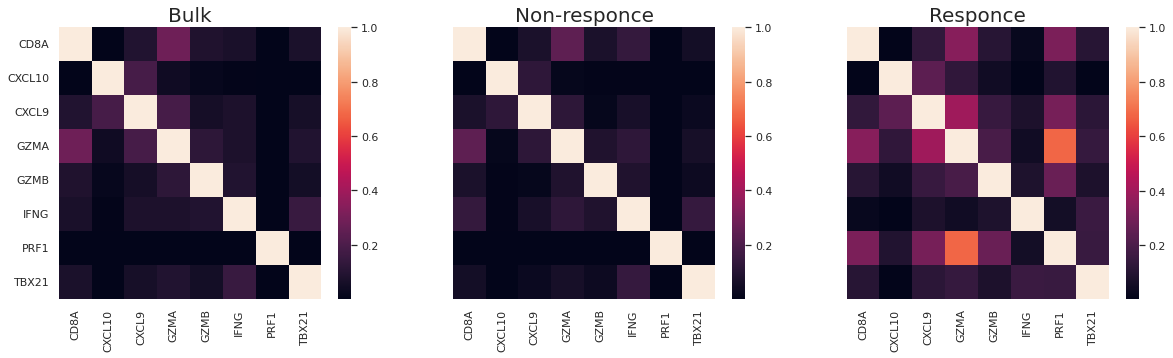

In [14]:
sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 5))
sns.heatmap(inf_genes_bulk_sim, xticklabels=inf_genes, yticklabels=inf_genes, ax=ax1)
sns.heatmap(inf_genes_nonresp_sim, xticklabels=inf_genes, yticklabels=inf_genes, ax=ax2)
sns.heatmap(inf_genes_resp_sim, xticklabels=inf_genes, yticklabels=inf_genes, ax=ax3)
ax1.set_title('Bulk', fontsize=20)
ax2.set_title('Non-responce', fontsize=20)
ax3.set_title('Responce', fontsize=20)
plt.savefig(fname='heatmaps_1.pdf', dpi=1000)
fig.show()

/tmp/ipykernel_412140/1889403539.py:9: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


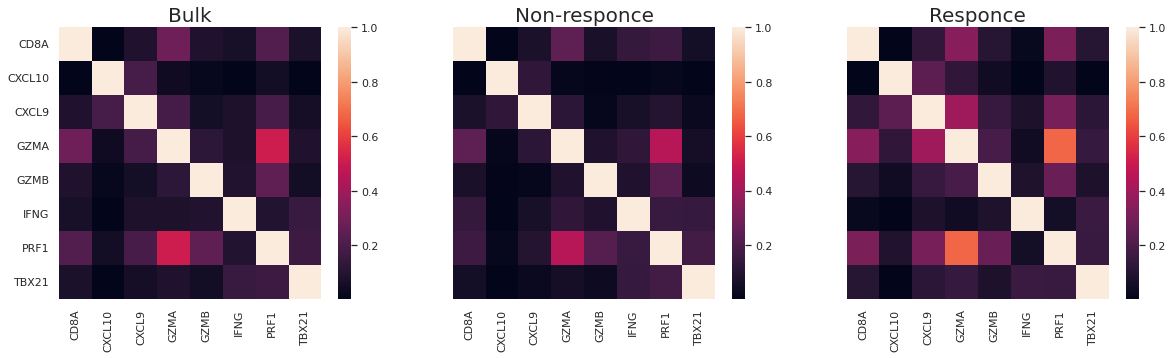

In [16]:
sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 5))
sns.heatmap(inf_genes_bulk_sim, xticklabels=inf_genes, yticklabels=inf_genes, ax=ax1)
sns.heatmap(inf_genes_nonresp_sim, xticklabels=inf_genes, yticklabels=inf_genes, ax=ax2)
sns.heatmap(inf_genes_resp_sim, xticklabels=inf_genes, yticklabels=inf_genes, ax=ax3)
ax1.set_title('Bulk', fontsize=20)
ax2.set_title('Non-responce', fontsize=20)
ax3.set_title('Responce', fontsize=20)
fig.show()

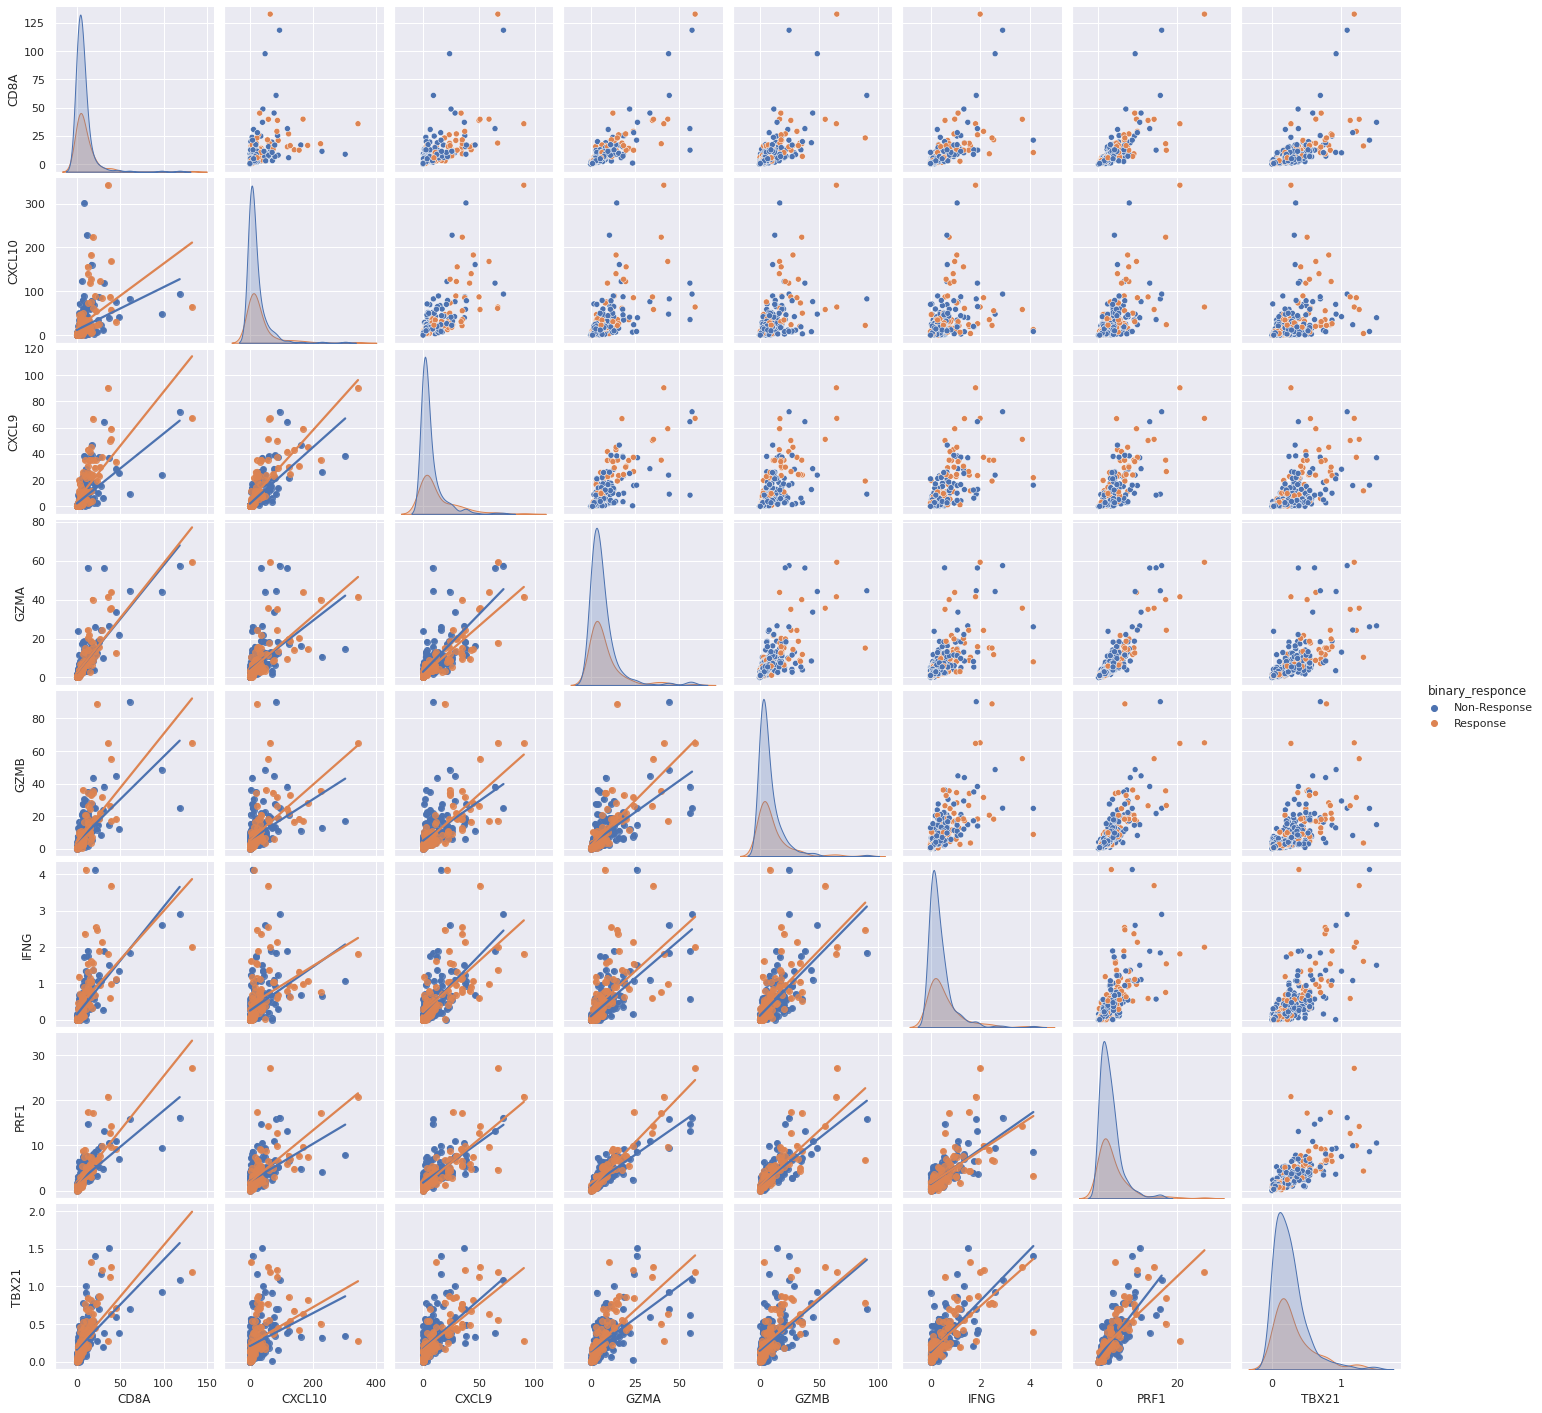

In [29]:
keys = {True: 'Non-Response', False: 'Response'}
g = sns.pairplot(pd.concat((clear_data[inf_genes], pd.Series([keys[i] for i in features], index=clear_data.index, name='binary_responce')), axis=1).query('PRF1<280'),
             hue='binary_responce')
g.map_lower(sns.regplot, ci=None)
g.savefig('pairplot_lms.jpg', dpi=300)

In [65]:
pd.concat((clear_data[inf_genes], pd.Series([keys[i] for i in features], index=clear_data.index, name='binary_responce')), axis=1)

,CD8A,CXCL10,CXCL9,GZMA,GZMB,IFNG,PRF1,TBX21,binary_responce
SAM5cc2d9036053,2.967310,0.744357,0.386519,2.05562,1.543156,0.079864,2.515150,0.242056,Non-Response
SAM568ce160abd9,9.024520,0.540389,0.369721,4.46629,0.791713,0.130483,2.945090,0.198424,Non-Response
SAMbfdffb97c446,11.444900,28.987100,10.018900,8.59309,17.383277,0.768669,4.951680,0.240858,Non-Response
SAM14938611a2d3,4.629280,37.447400,7.043630,3.49718,4.879516,0.284924,1.953139,0.214402,Response
SAM675a12a09c15,1.487280,1.550100,0.775403,1.59257,0.772639,0.024136,0.519155,0.091757,Non-Response
...,...,...,...,...,...,...,...,...,...
SAM110501d0eedb,2.977132,14.279000,8.539930,2.89214,3.891866,0.213593,1.473241,0.234893,Non-Response
SAM065890737112,5.658530,23.094100,9.786020,5.85019,9.741044,0.518184,2.440191,0.219459,Response
SAM28e6031ac18b,0.619952,0.310308,0.048478,1.00502,0.562296,0.000000,0.324389,0.026019,Non-Response
SAMe94c30c30616,4.793940,11.912700,3.730340,5.40778,6.820137,0.468311,3.725437,0.282036,Non-Response


In [24]:
clear_data

,PARP4,MIPEP,KATNAL1,UBE2L5,CCNA1,USPL1,HMGB1,SOHLH2,GPALPP1,HSPH1,...,UBIAD1,ZNF687,PI4KB,RFX5,SELENBP1,PSMB4,CGN,TUFT1,POGZ,RPS6KA1
SAM5cc2d9036053,34.630080,10.958092,7.684974,0.000000,0.054485,8.97402,155.403945,0.116785,16.568970,72.900693,...,12.067421,5.844156,76.027354,61.084735,20.588132,96.652825,54.965020,34.668180,64.058942,15.728685
SAM568ce160abd9,39.720388,9.503548,14.465686,0.072927,0.579744,9.52599,133.242834,0.422643,19.888790,58.195025,...,9.195640,4.044897,54.548353,32.267310,18.389704,108.600852,26.727391,15.945376,86.895816,8.406308
SAMbfdffb97c446,39.919292,9.747908,6.888243,0.348228,0.089853,14.07366,146.273675,0.551743,20.555434,97.747532,...,17.386819,13.345547,99.740610,32.287639,5.379508,275.374180,65.980619,97.162883,78.571082,15.556833
SAM14938611a2d3,58.419478,36.087746,6.344313,0.010376,0.129770,9.27892,162.819233,0.331109,13.042333,105.611330,...,12.875988,14.307622,107.795383,56.999348,29.535364,221.992737,292.970970,148.242989,97.129081,14.757478
SAM675a12a09c15,68.579041,11.442537,6.098883,0.406916,0.197142,10.97936,155.517311,0.092450,26.131189,56.077748,...,14.260708,8.123394,71.524674,27.832492,24.086803,142.808892,140.913250,54.052127,70.276584,16.733368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAM110501d0eedb,55.155323,19.572884,2.409174,0.010974,0.000000,10.76579,112.188630,0.137890,27.631090,113.847600,...,18.581394,12.392991,114.253425,60.734674,8.391175,169.696899,146.701181,62.481829,47.785724,10.895298
SAM065890737112,66.639831,8.670669,1.383004,0.061545,1.178930,9.94354,154.335341,0.126115,24.593748,67.254129,...,15.423004,25.770280,177.768342,88.659259,2.736124,344.019150,193.655224,139.063462,141.224854,7.725825
SAM28e6031ac18b,112.612322,11.300408,2.397337,0.000000,0.296888,15.18086,138.710594,0.273832,33.140922,105.829210,...,13.629683,11.118360,70.567328,40.662220,1.354343,168.487630,19.768333,60.613820,76.514890,11.092980
SAMe94c30c30616,59.892890,15.213199,4.232801,0.151943,0.160210,13.53458,117.913102,0.135943,29.535951,60.725859,...,16.665296,10.539385,69.903290,37.938410,5.472449,139.089327,129.716500,82.971820,50.006149,9.356026


In [64]:
pd.Series([keys[i] for i in features], index=clear_data.index, name='binary_responce')

SAM5cc2d9036053    Non-Response
SAM568ce160abd9    Non-Response
SAMbfdffb97c446    Non-Response
SAM14938611a2d3        Response
SAM675a12a09c15    Non-Response
                       ...     
SAM110501d0eedb    Non-Response
SAM065890737112        Response
SAM28e6031ac18b    Non-Response
SAMe94c30c30616    Non-Response
SAM166a419a4e5a    Non-Response
Name: binary_responce, Length: 347, dtype: object

In [33]:
input_df = pd.read_csv('Immune_genes.txt', sep='\t')
imgenes = pd.DataFrame()
for line in input_df.iterrows():
    gf = line[1]['GENE FUNCTION']
    #print((line[1]))
    gf = gf.lower()
    if gf.find('housekeeping') == -1:
        imgenes = pd.concat((imgenes, pd.Series(line[1])), axis = 1)
imgenes = imgenes.T

In [34]:
imgenes = list(imgenes['Gene'])

In [36]:
buf = []
all_genes = list(clear_data.columns)

for i in imgenes:
    if i in all_genes:
        buf.append(i)
imgenes = buf


In [37]:
immune_genes_bulk_sim = utils.get_adjacency(clear_data[imgenes].values)
immune_genes_resp_sim = utils.get_adjacency(resp[imgenes].values)
immune_genes_nonresp_sim = utils.get_adjacency(nonresp[imgenes].values)

In [38]:
diff = np.abs(immune_genes_nonresp_sim - immune_genes_resp_sim)

/tmp/ipykernel_231639/1097873076.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


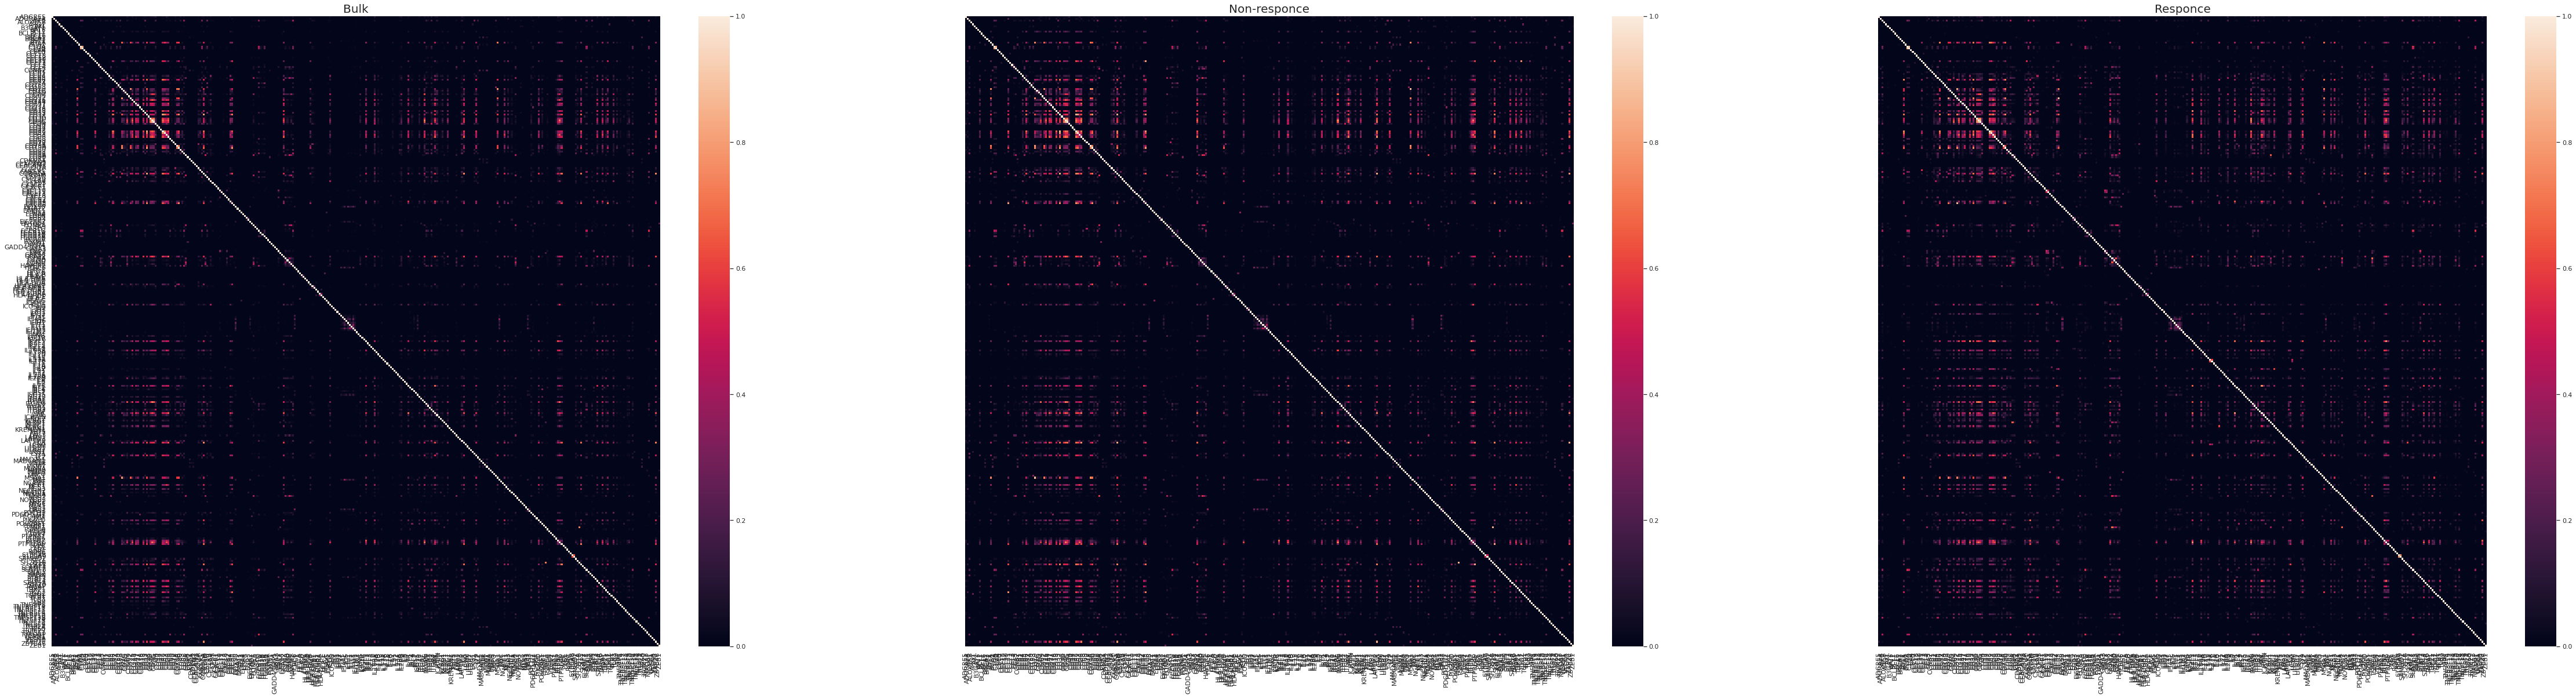

In [42]:
sns.set_theme()
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(80, 20))
sns.heatmap(immune_genes_bulk_sim, xticklabels=imgenes, yticklabels=imgenes, ax=ax1)
sns.heatmap(immune_genes_nonresp_sim, xticklabels=imgenes, yticklabels=imgenes, ax=ax2)
sns.heatmap(immune_genes_resp_sim, xticklabels=imgenes, yticklabels=imgenes, ax=ax3)
ax1.set_title('Bulk', fontsize=20)
ax2.set_title('Non-responce', fontsize=20)
ax3.set_title('Responce', fontsize=20)
plt.savefig(fname='heatmaps_2.pdf', dpi=600)
fig.show()

/home/alexandr/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


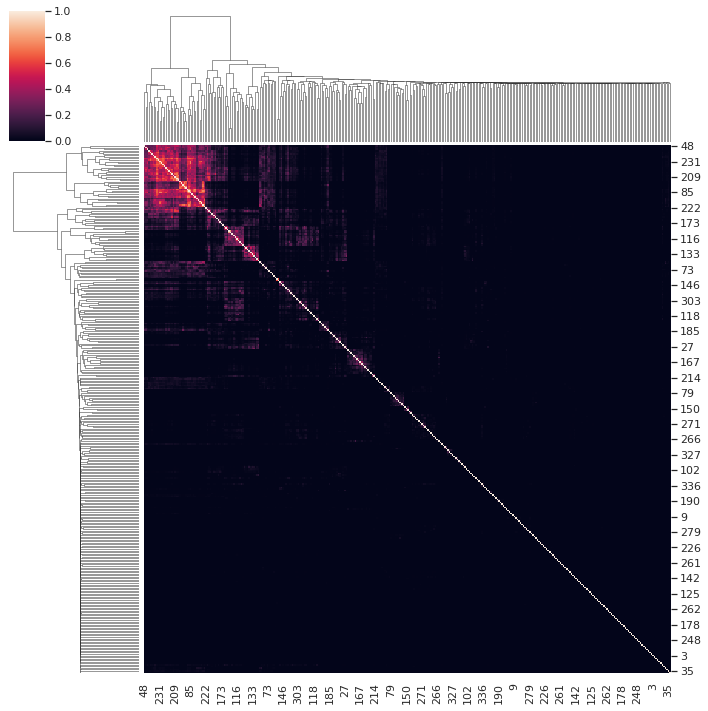

In [39]:
sns.set_theme()
#fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(30, 20))
g = sns.clustermap(immune_genes_bulk_sim)

g.dendrogram_row.reordered_ind
#plt.savefig(fname='heatmaps_3.pdf', dpi=400)
immune_genes_bulk_reord = immune_genes_bulk_sim[:,g.dendrogram_row.reordered_ind]
immune_genes_bulk_reord = immune_genes_bulk_reord[g.dendrogram_row.reordered_ind]

diff_reord = diff[:,g.dendrogram_row.reordered_ind]
diff_reord = diff_reord[g.dendrogram_row.reordered_ind]

In [29]:
sns.clustermap(diff)

NameError: name 'diff' is not defined

/tmp/ipykernel_19275/1641076066.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


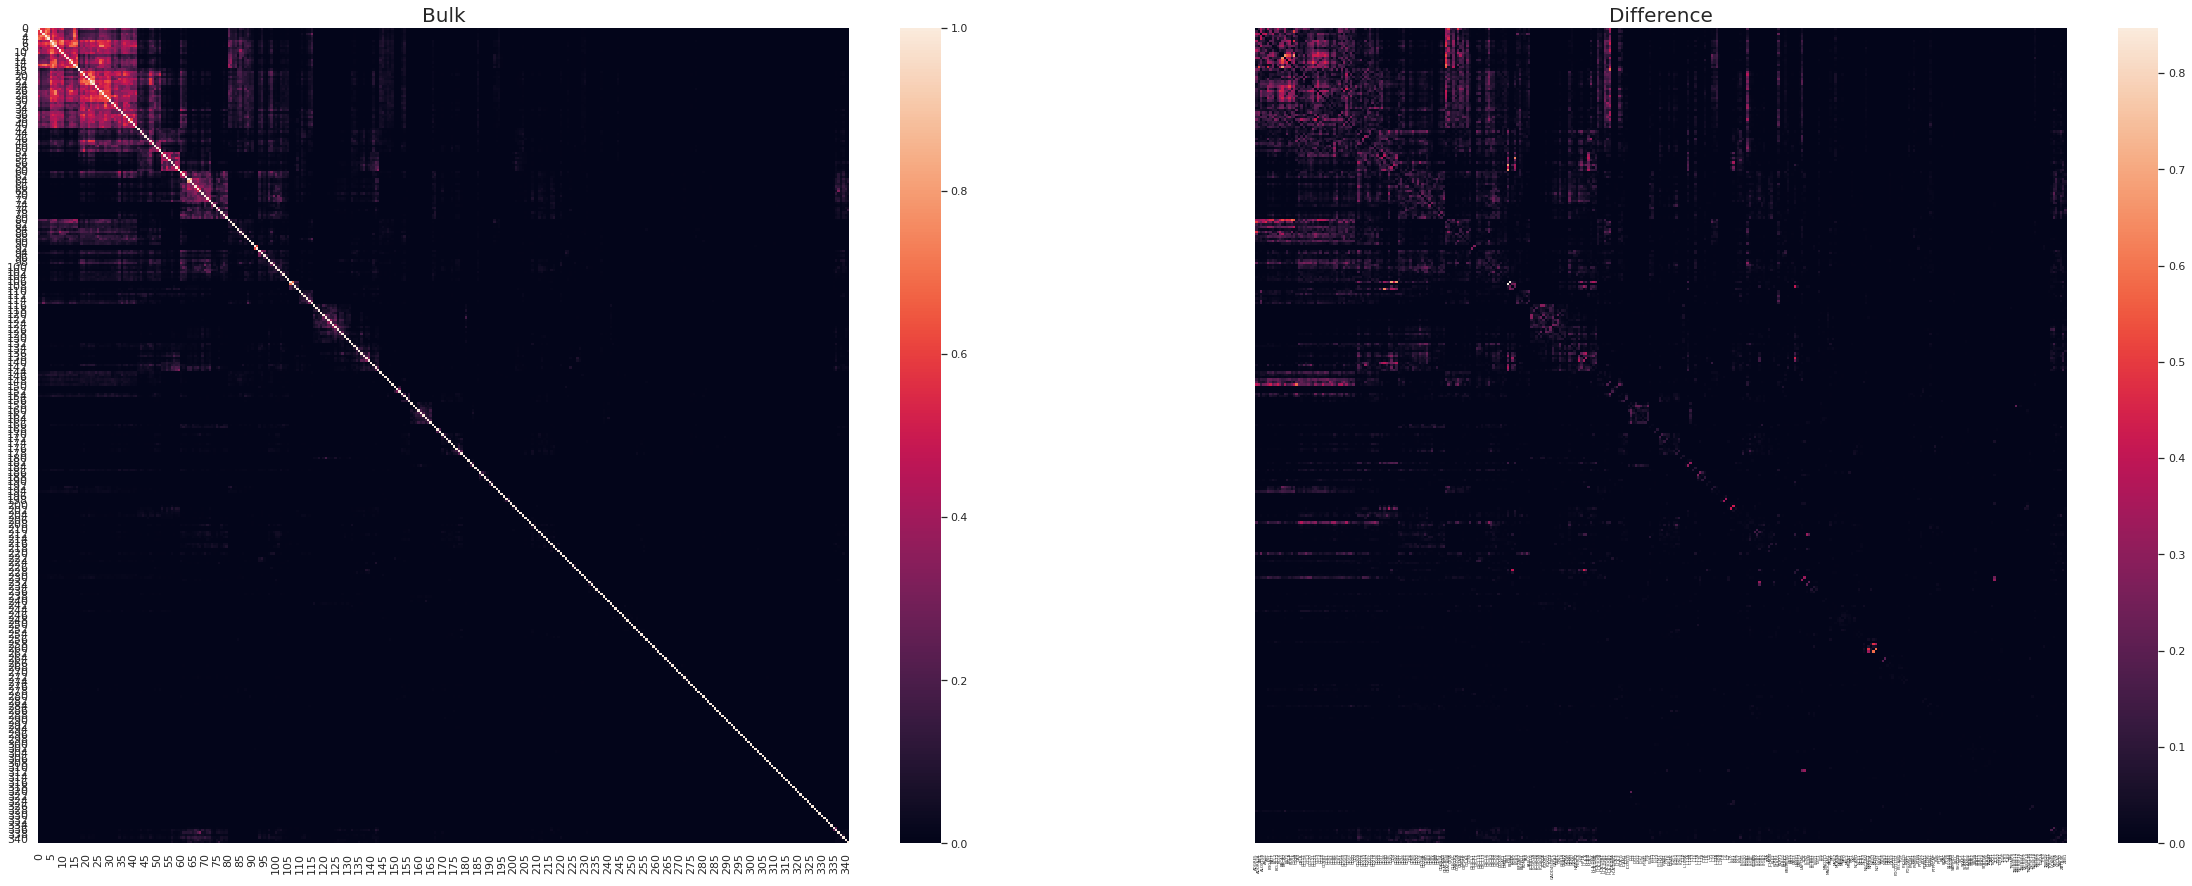

In [45]:
sns.set_theme()
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(40, 15))

plt.tick_params(labelsize=4)
sns.heatmap(immune_genes_bulk_reord, yticklabels=imgenes, ax=ax1)
sns.heatmap(diff_reord, xticklabels=imgenes, ax=ax2)

ax1.set_title('Bulk', fontsize=20)
ax2.set_title('Difference', fontsize=20)



plt.savefig(fname='heatmaps_5.pdf', dpi=300)

fig.show()

In [ ]:
fig, ax = plt.subplots(nrows=4, ncols=2)
for i in range(4):
    


cxcl9 prfn grnzm cd8a

CXCL9 PRF1


IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

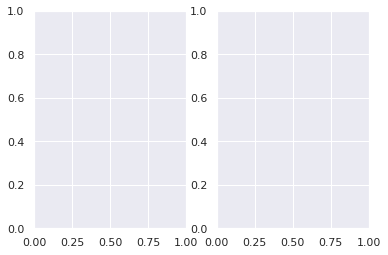

In [28]:
genes_pic = ['CXCL9', 'PRF1', 'GZMA', 'GZMB', 'CD8A']
fig, ax = plt.subplots(nrows=1, ncols=2)
cntr = 0
for g1 in genes_pic:
    for g2 in genes_pic[genes_pic.index(g1)+1:]:
        print(g1, g2)
        sns.scatterplot(data=nonresp[[g1, g2]], x=g1, y=g2, ax = ax[cntr, 0])
        sns.scatterplot(data=resp[[g1, g2]], x=g1, y=g2, ax = ax[cntr, 1])
        cntr+=1
sns.scatterplot(data=nonresp[['CXCL9', 'PRF1']], x='CXCL9', y='PRF1', ax = ax[0])
sns.scatterplot(data=resp[['CXCL9', 'PRF1']], x='CXCL9', y='PRF1', ax = ax[1])

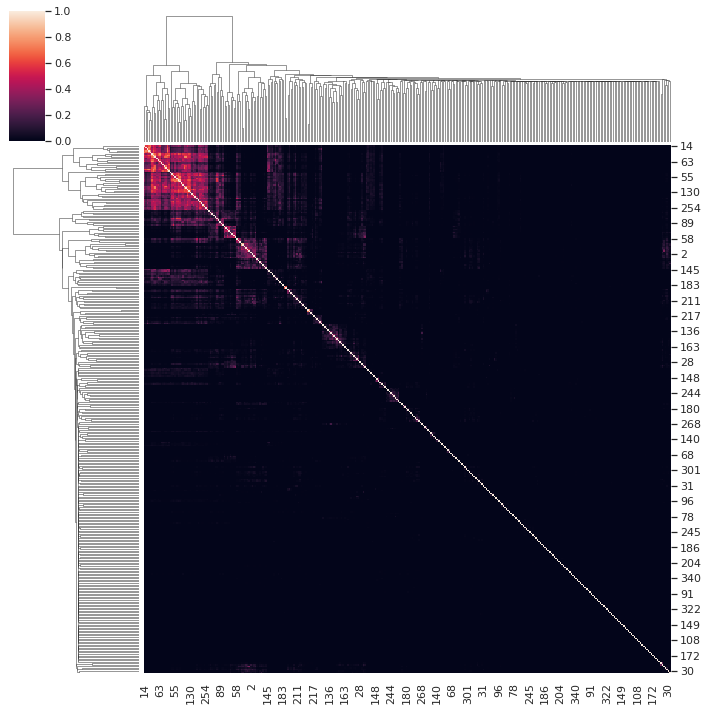

In [36]:
sns.set_theme()
#fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(30, 20))
g = sns.clustermap(immune_genes_bulk_sim)

g.dendrogram_row.reordered_ind
#plt.savefig(fname='heatmaps_3.pdf', dpi=400)


In [39]:
fff = diff[:,g.dendrogram_row.reordered_ind]
fff = fff[g.dendrogram_row.reordered_ind]

<AxesSubplot:>

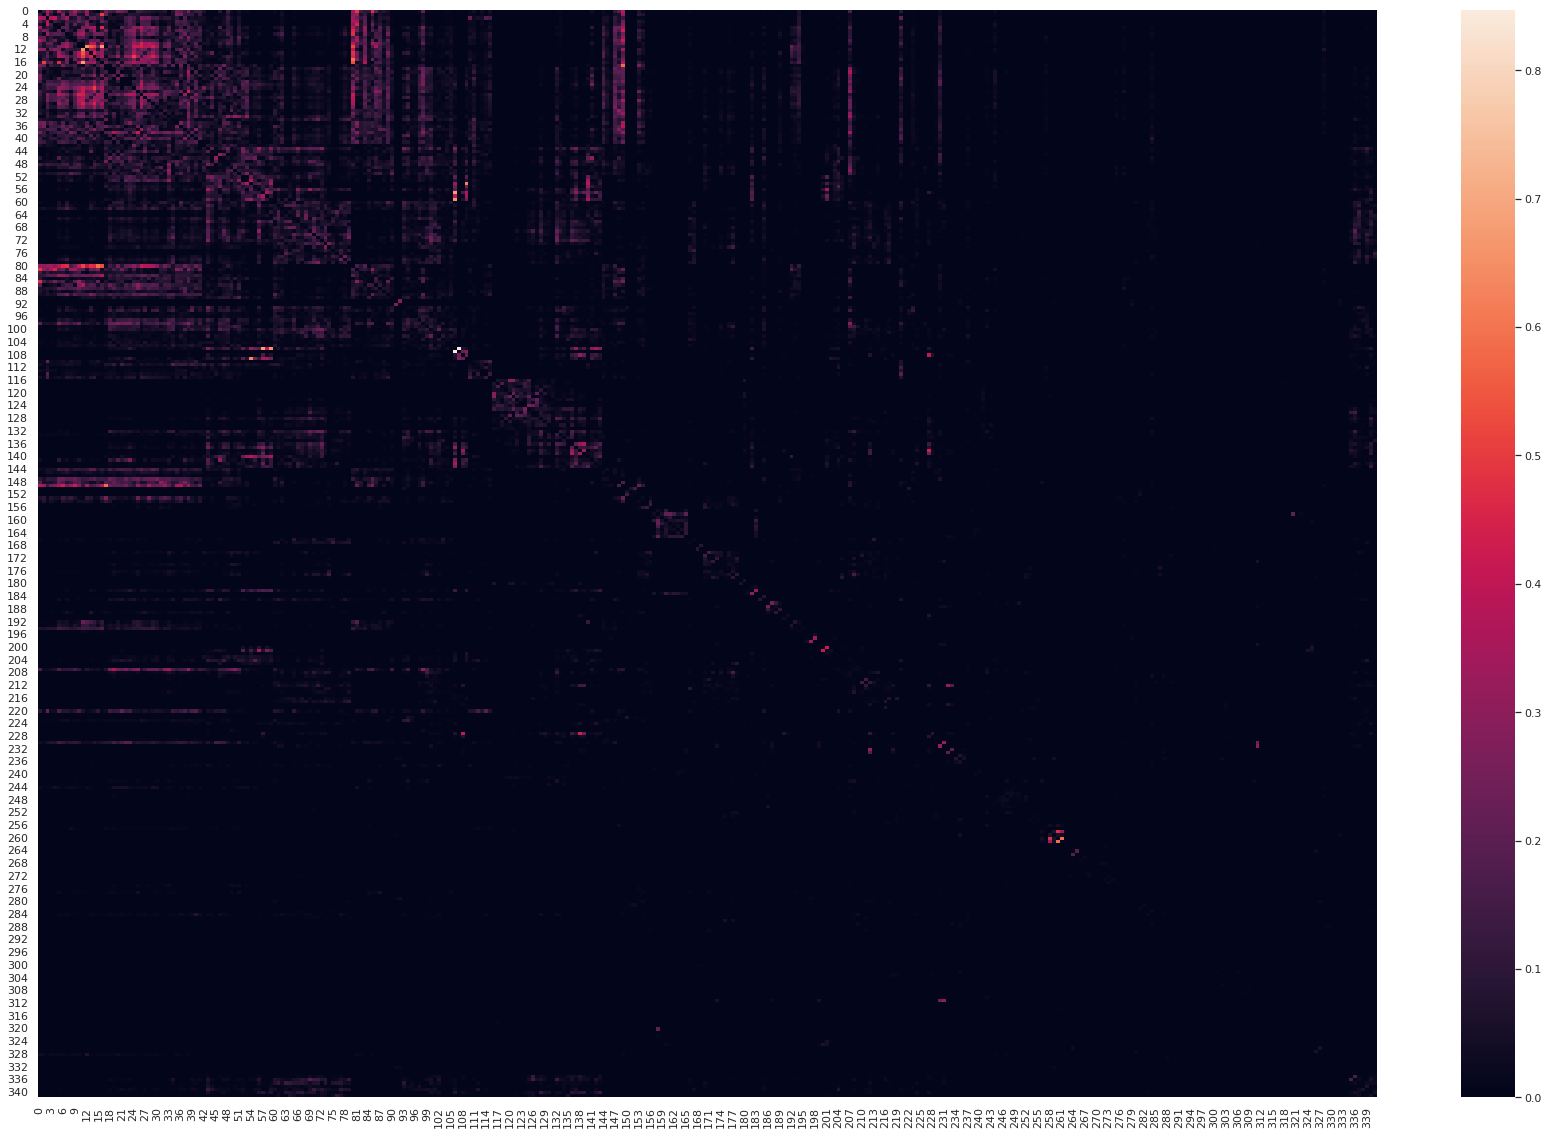

In [42]:
sns.set_theme()
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(30, 20))
sns.heatmap(fff)


In [71]:
ppp = diff[g.dendrogram_row.reordered_ind]
ppp = diff[:,g.dendrogram_row.reordered_ind]

In [67]:
diff

array([[6.66133815e-16, 9.32623540e-04, 7.15459270e-03, ...,
        6.05266156e-02, 6.38453489e-03, 2.45081027e-04],
       [9.32623540e-04, 6.66133815e-16, 3.34404592e-07, ...,
        3.27514766e-02, 6.10602687e-06, 4.34059062e-10],
       [7.15459270e-03, 3.34404592e-07, 0.00000000e+00, ...,
        3.50255267e-02, 3.60374753e-04, 3.48069628e-03],
       ...,
       [6.05266156e-02, 3.27514766e-02, 3.50255267e-02, ...,
        0.00000000e+00, 1.80394627e-03, 1.45339745e-05],
       [6.38453489e-03, 6.10602687e-06, 3.60374753e-04, ...,
        1.80394627e-03, 6.66133815e-16, 1.03740597e-03],
       [2.45081027e-04, 4.34059062e-10, 3.48069628e-03, ...,
        1.45339745e-05, 1.03740597e-03, 6.66133815e-16]])

In [ ]:
1-nonresp
0-resp